# Heat
[<!-- module-phyp badge --><span class="module module-phyp">Physical Processes</span>](module-phyp) 
```{index} Temperature
```
```{index} Heat
```
```{index} Heat flow
```
```{index} Specific heat
```
```{index} Latent heat
```

In [1]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from math import log10, floor

In [2]:
# create our own functions

# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    if value_rounded == int(value_rounded): 
        value_rounded = int(value_rounded)
    return value_rounded


# function for extracting float from string
def extract_float_from_str(string):
    float_str = ''
    for c in string:
        if c in '1234567890.':
            float_str += c
    if float_str != '':
        return float(float_str)
    else:
        return 'no float'
            
        
# function for calculating time in seconds from string (unit must be fully expressed e.g. 'second' not 'sec')
def time_s_from_str(string):
    t = extract_float_from_str(string)
    # dictionary of units of time coupled with conversion factors
    unit_and_conversion_factor_dict = {
        'second' : 1,
        'minute' : 60,
        'hour' : 60*60,
        'day' : 60*60*24,
        'month' : 60*60*24*30,
        'million year' : 60*60*24*365.25*10**6,
        'billion year' : 60*60*24*365.25*10**9,
        'year' : 60*60*24*365.25  # should be after 'million year' and 'billion year' for purpose of breaking loop
    }
    if t != 'no float':
        # check unit (not all units are included in this function)
        for unit in unit_and_conversion_factor_dict:
            if unit in string:
                t *= unit_and_conversion_factor_dict[unit]
                break
        # return time in seconds
        return t
    else:
        return 'invalid'

    
# function for returning appropriate string from time in seconds
def time_s_to_str(t):
    string = ''
    conversion_factor_and_unit_dict = {
        60*60*24*365.25*10**9 : 'billion year',
        60*60*24*365.25*10**6 : 'million year',
        60*60*24*365.25 : 'year',
        60*60*24*30 : 'month',
        60*60*24 : 'day',
        60*60 : 'hour',
        60 : 'minute',
        1 : 'second'
    }
    if (type(t) == int or type(t) == float) and t >= 0:
        for conv in conversion_factor_and_unit_dict:
            if t >= conv:
                t = round_to_n_sf(t/conv, 2)
                if round(t) == t:
                    t = int(t)
                string += f'{t} ' + conversion_factor_and_unit_dict[conv]
                if t > 1: 
                    string += 's'
                break
        if string == '':  # t < 1 s
            t = round_to_n_sf(t, 1)
            string += f'{t} second'
    else: 
        string += 'invalid'
    return string

        
# function for calculating distance in m from string (unit must be abbreviated e.g. mm, cm)
def distance_m_from_str(string):
    d = extract_float_from_str(string)
    # dictionary of units of time coupled with conversion factors
    unit_and_conversion_factor_dict = {
        'mm' : 10**-3,
        'cm' : 10**-2,
        'km' : 10**3,
        'm' : 1
    }
    if d != 'no float':
        # check unit (not all units are included in this function)
        for unit in unit_and_conversion_factor_dict:
            if unit in string:
                d *= unit_and_conversion_factor_dict[unit]
                break
        # return distance in m
        return d
    else:
        return 'invalid'

    
# function for returning appropriate string from distance in m
def distance_m_to_str(d):
    string = ''
    conversion_factor_and_unit_dict = {
        10**3 : 'km',
        1 : 'm',
        10**-2 : 'cm',
        10**-3 : 'mm'
    }
    if (type(d) == int or type(d) == float) and d >= 0:
        for conv in conversion_factor_and_unit_dict:
            if d >= conv:
                d = round_to_n_sf(d/conv, 2)
                if round(d) == d:
                    d = int(d)
                string += f'{d} ' + conversion_factor_and_unit_dict[conv]
                break
        if string == '':  # d < 1 mm
            d = round_to_n_sf(d/conv, 1)
            string += f'{d} mm'                
    else: 
        string += 'invalid'
    return string



## Temperature and heat

   * **Temperature** is the property of a body that controls the direction of the flow of heat to or from its surroundings. Its SI units are kelvin, symbol $K$ (not degrees $K$ or $^\circ K$) where $273.15\,K \equiv 0^\circ C$; its dimensions are $[\Theta]$. A temperature interval of $1\,K \equiv 1^\circ C$; 
   * **Heat** is energy that is transferred to or from a body, to or from its surroundings, as a result of a difference in their temperatures. Its SI units are joules; its dimensions are $[ML^{2}T^{-2}]$. It is commonly given the symbol $Q$.
   * **Heat flow** can be used simply to mean "a flow of heat", but the term is more commonly used for a flow of heat through unit area in unit time. In the former case the SI units are watts ($W$) with dimensions $[ML^{2}T^{-3}]$ and confusingly it is also commonly given the same symbol as heat ($Q$). In the latter case, its SI units are $W\,m^{-2}$, and its dimensions are $[MT^{-3}]$. It is commonly given the symbol $q$.
   
### Specific Heat

Specific heat controls the amount of energy required to change the temperature of a substance where $E = c m \Delta T$ is the energy required to raise the temperature of a mass m of a substance with specific heat $c$ by an amount $\Delta T$.

To specify the energy that is required, we must also specify the conditions under which the change in temperature takes place. Constant pressure and constant volume are two common conditions leading to two specific heats $c_p$ and $c_v$. For gases these two specific heats are significantly different, but for solids and liquids they are similar in size. Because large stresses may be involved in changing the temperature of a solid while keeping its volume constant, $c_p$ is nearly always the appropriate specific heat to use in the solid Earth sciences.

### Latent heat

Changes in phase at constant temperature, for example from solid to liquid or from gabbro to eclogite, typically involve a transfer of heat into or out of the surroundings. This happens because the phase change involves the internal rearrangement of inter-atomic and intermolecular forces, and energy is absorbed or released as a consequence. The total heat $Q$ involved in the phase change depends upon both the latent heat $L$ of the particular phase change and upon the total mass m of material involved, $Q = Lm$. The latent heat can be positive or negative.

Latent heat associated with solid-state phase changes in the mantle appear to play a significant role in controlling the geometry of mantle convection. Latent heat associated with the evaporation and condensation of water plays a major role within the climate system. 

The plot below shows the thermal change at constant pressure ($1\,atm$) of $100\,g$ of water over time in a kettle with a power of $700\,W$. The initial state of water is assumed to be ice at $-20^\circ C$.

Text(0.5, 1.0, 'The thermal change at constant pressure ($1\\,atm$) of $100\\,g$ of water\nover time in a kettle with a power of $700\\,W$')

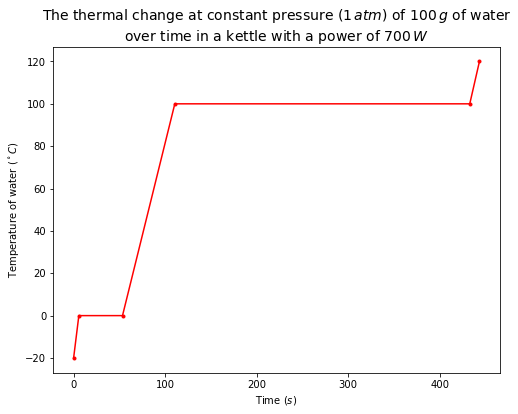

In [3]:
# plot the thermal change of 100 g water heated by a kettle with a power of 700 W (J/s) over time

# function for calculating specific heat
def specific_heat(mass, specific_heat_capacity, temperature_change):
    return mass * specific_heat_capacity * temperature_change


# function for calculating latent heat
def latent_heat(mass, latent_heat_of_state_change):
    return mass * latent_heat_of_state_change


# function for converting energy (W) to time (t) (by power P = W/t)
def energy_to_time(energy, power):
    return energy/power


# value of each parameter
# some constants were taken from https://www.engineeringtoolbox.com
mass_water = 0.1  # kg
Cp_water_ice = 2  # kJ/(kg.K)  # assumed to be constant at all temperature levels between -20 to 0 C
Cp_liquid_water = 4  # kJ/(kg.K)  # assumed to be constant at all temperature levels between 0 to 100 C
Cp_water_vapour = 3.7  # kJ/(kg.K)  # assumed to be constant at all temperature levels between 100-120 C
L_melting = 334  # kJ/kg
L_evaporation = 2256  # kJ/kg
power_kettle = 0.7  # kJ/s
T_initial = -20  # C
T_final = 120  # C
T_melting_point = 0  # C
T_boiling_point = 100  # C
T = [T_initial, T_melting_point, T_melting_point, T_boiling_point, T_boiling_point, T_final]  # list of important T
cumulative_heat = 0  # cumulative heat produced by the kettle, received by water (kJ)
time = [0]  # time (s)

# thermal change
# specific heat involved in raising the temperature of water ice from -20 to 0 C
specific_heat_water_ice = specific_heat(mass_water, Cp_water_ice, T_melting_point - T_initial)
cumulative_heat += specific_heat_water_ice
time.append(energy_to_time(cumulative_heat, power_kettle))
# latent heat involved in melting the ice
latent_heat_melting = latent_heat(mass_water, L_melting)
cumulative_heat += latent_heat_melting
time.append(energy_to_time(cumulative_heat, power_kettle))
# specific heat involved in raising the temperature of liquid water from 0 to 100 C
specific_heat_liquid_water = specific_heat(mass_water, Cp_liquid_water, T_boiling_point - T_melting_point)
cumulative_heat += specific_heat_liquid_water
time.append(energy_to_time(cumulative_heat, power_kettle))
# latent heat involved in evaporating the water
latent_heat_evaporation = latent_heat(mass_water, L_evaporation)
cumulative_heat += latent_heat_evaporation
time.append(energy_to_time(cumulative_heat, power_kettle))
# specific heat involved in raising the temperature of water vapour from 100 to 120 C
specific_heat_water_vapour = specific_heat(mass_water, Cp_water_vapour, T_final - T_boiling_point)
cumulative_heat += specific_heat_water_vapour
time.append(energy_to_time(cumulative_heat, power_kettle))

# plot
plt.figure(figsize=(8,6))
plt.plot(time, T, 'r.-')
plt.xlabel('Time ($s$)')
plt.ylabel('Temperature of water ($^\circ C$)')
plt.title('The thermal change at constant pressure ($1\,atm$) of $100\,g$ of water\nover time in a kettle with a power of $700\,W$', fontsize=14)

## Thermal expansion
```{index} Thermal expansion
```

The coefficient of thermal expansion $\alpha$ controls the change in volume of a substance produced by a change in its temperature. Note that, for solids, we can also define a coefficient of linear thermal expansion $\approx \alpha /3$. Thermal expansion and contraction ultimately drives nearly all geological processes by its effect upon density which in turn controls isostasy and drives subduction.

The change in volume $\Delta V$ produced by a change in temperature of $\Delta T$ is given by 

$$\Delta V = +\alpha V \Delta T$$

where the plus sign indicates that the volume increases if $\Delta T$ is positive.

Equivalently, the change in density $\Delta \rho$ produced by a change in temperature of $\Delta T$ is given by 

$$\Delta \rho = −\alpha \rho \Delta T$$

where the minus sign indicates that the density decreases if $\Delta T$ is positive. 

The new density $\rho_T$ is given by 

$$\rho_{T} = \rho_{0}(1-\alpha \Delta T)$$ 

Note that $\rho_{0}$ is not the density at temperature $T = 0$, rather it is the density at the temperature from which the change $\Delta T$ is measured.

## Heat transfer

In large part, the solid Earth acts as a heat engine, moving heat from its interior to its exterior, and in the process generating the tectonic cycle and driving its geological consequences. The oceans and atmosphere also act as a heat engine, transferring heat away from the tropics towards the poles, and in the process driving the climatic cycle and ocean circulation which in turn drive surface geological processes. Consequently, the physics of heat transfer is central
to understanding how the Earth works. 

There are three processes by which heat can be transferred – **thermal conduction** in which random microscopic motions cause heat to diffuse through a material, **advection** in which moving material carries heat within it, and **thermal radiation** in which electromagnetic waves transfer energy. **Thermal convection** is a special form of advection in which the motion of the material is produced by temperature-driven density differences.

### Thermal conduction
```{index} Thermal conduction
```
Whenever two regions in contact have different temperatures, heat will move between them by the process of thermal conduction. The amount of heat $q$ conducted through unit area in unit time depends upon the temperature difference $\Delta T$, the distance $x$ that it has to travel, and the **thermal conductivity** $k$ of the material through which it travels. This is expressed by **Fourier’s law of thermal conduction**:

$$q = -k \frac{\Delta T}{x}$$

where the minus sign indicates that heat flows from hot to cold. The heat flow $q$ has units of $W\,m^{−2}$, and the thermal conductivity $k$ has the units of $W\,m^{−1}\,K^{−1}$.

If the change in temperature does not vary linearly with distance (that is, if a plot of $T$ versus $x$ is not a straight line), then Fourier’s law becomes a differential equation where the heat flow at any point depends upon the local geothermal thermal gradient $dT/dx$

$$q(x) = -k \frac{dT}{dx}$$

### Thermal diffusion
```{index} Thermal diffusion
```
In its simple form, Fourier’s law does not immediately let us perform calculations in which temperature varies with time. In general, we know that regions of locally high temperature will lose heat to adjacent regions, and in time irregularities in temperature will tend to be smoothed out unless they are maintained by some active process (Figure 1, left and middle). If, however, temperature varies linearly with distance, between two points where temperature remains fixed with time, then there is no change in temperature with time. In this latter system, heat will flow along the thermal gradient, but no temporal changes in temperature will occur (Figure 1, right).

<p style="text-align:center;"><img src="images/Figure_7_1.png" style= "width: 70%"></p>

$\qquad$Figure 1: left, regions of locally high temperature will cool down by conduction to their surroundings (centre). Right, if the top is maintained at a low temperature and the bottom is maintained at a higher temperature then there is constant heat flow from bottom to top and the there will be a linear temperature gradient from bottom to top.

The process that smoothes temperature with time by thermal conduction is called thermal diffusion. A similar diffusion process (mass or molecular diffusion) acts not only to smooth out irregularities in temperature, but also many other irregularities – for example the concentration of a mobile chemical species in a substrate or local momentum within a viscous fluid. 

In mass diffusion problems, the parameter that controls the rate of diffusion is called the <u>*diffusion coefficient*</u> $D$. If it is heat that is being diffused, then the diffusion coefficient is called the <u>*thermal diffusivity*</u> and given the symbol $\kappa$, a Greek “kappa”. The dimensions of $D$ and $\kappa$ are $[L^2T^{−1}]$. Their units are $m^2s^{−1}$. 

The larger the value of $\kappa$ or $D$, then the more rapid the diffusion. Thermal diffusivity $\kappa$ is related to the density $\rho$, specific heat $c_p$ and thermal conductivity $k$ of the material through which heat is diffusing:

$$\kappa \equiv \frac{k}{\rho c_p}$$

For the mantle, and for most crustal rocks, $\kappa \approx 10^{−6} m^2s^{−1}$.

#### Length and time scales for diffusion

The solution to diffusion problems depends upon the geometry and the boundary conditions, but in general, such solutions contain a characteristic time $t$ and distance $x$ that are related by:

$$t \sim \frac{x^2}{\kappa} \qquad or \qquad x \sim \sqrt{\kappa t}$$

These characteristic scales have a simple interpretation (see Figure 2): 

   * a sphere with a radius $x$, or a cylinder with a radius $x$, or a plane layer with a half-width $x$, can change its temperature significantly by thermal conduction within a time $t \sim {x^2}/{\kappa}$;
   * or equivalently, if the boundary of an object is maintained for a time $t$ at a temperature that is different to the temperature of its interior, then a thermal boundary layer will develop within the body that has a half-width $x \sim \sqrt{\kappa t}$.
   
<p style="text-align:center;"><img src="images/Figure_7_2.png" style= "width: 60%"></p>

$\qquad$Figure 2: characteristic length scales for heat or mass diffusion for a) a sphere, b) a layer and c) a layer with one face maintained at a constant temperature.

## Practical 7 - Question 3

Complete the table below for transport of heat by thermal diffusion assuming $\kappa \approx 10^{−6} m^2s^{−1}$.

In [4]:
# The table for this question
t_column = ['', '12 hours', '6 months', '', '12,000 years', '', '', '4.5 billion years', '', '14 billion years']
x_column = ['0.5 mm', '', '', '10 m', '', '15 km', '50 km', '', '6380 km', '']
contexts_column = ['sand grain (diameter ~ 1 mm)', 'day to night temperature change', 'summer to winter',
           'dyke or sill (thickness ~ 20 m)', 'time since ice age', 'thickness of continental crust (~ 30 km)',
           'thickness of lithosphere (~ 100 km)', 'age of Earth', 'radius of Earth', 'age of the universe']

# create a dataframe
dict1 = {
    'Characteristic time $t$' : t_column,
    'Characteristic length $x$ (radius or half-width)' : x_column,
    'Context' : contexts_column,
}
df1 = pd.DataFrame(dict1)
display(df1.style.hide_index())

Characteristic time $t$,Characteristic length $x$ (radius or half-width),Context
,0.5 mm,sand grain (diameter ~ 1 mm)
12 hours,,day to night temperature change
6 months,,summer to winter
,10 m,dyke or sill (thickness ~ 20 m)
"12,000 years",,time since ice age
,15 km,thickness of continental crust (~ 30 km)
,50 km,thickness of lithosphere (~ 100 km)
4.5 billion years,,age of Earth
,6380 km,radius of Earth
14 billion years,,age of the universe


<u>Solution</u>:

Use the equations:

$$t \sim \frac{x^2}{\kappa} \qquad or \qquad x \sim \sqrt{\kappa t}$$

Be careful of units!

In [5]:
# function for calculating characteristic time
def characteristic_time(characteristic_length, thermal_diffusivity):
    return characteristic_length**2 / thermal_diffusivity


# function for calculating characteristic length
def characteristic_length(characteristic_time, thermal_diffusivity):
    return (characteristic_time * thermal_diffusivity)**0.5

In [6]:
# create a new table including answers
k = 10**-6  # thermal diffusivity (m^2 s^-1)
new_t_column = []
new_x_column = []
for i in range(len(t_column)):
    if t_column[i] == '':
        x = distance_m_from_str(x_column[i])
        t = characteristic_time(x, k)
        new_t_column.append(time_s_to_str(t))
    else:
        new_t_column.append(t_column[i])

    if x_column[i] == '':
        t = time_s_from_str(t_column[i])
        x = characteristic_length(t, k)
        new_x_column.append(distance_m_to_str(x))
    else:
        new_x_column.append(x_column[i])

double_x_column = [distance_m_to_str(2*distance_m_from_str(x)) for x in new_x_column]

dict2 = {
    'Characteristic time $t$' : new_t_column,
    'Characteristic length $x$ (radius or half-width)' : new_x_column,
    'Diameter or width of layer' : double_x_column,
    'Context' : contexts_column
}
df2 = pd.DataFrame(dict2)
display(df2.style.hide_index())

Characteristic time $t$,Characteristic length $x$ (radius or half-width),Diameter or width of layer,Context
0.2 second,0.5 mm,1 mm,sand grain (diameter ~ 1 mm)
12 hours,21 cm,42 cm,day to night temperature change
6 months,3.9 m,7.8 m,summer to winter
3.2 years,10 m,20 m,dyke or sill (thickness ~ 20 m)
"12,000 years",620 m,1.2 km,time since ice age
7.1 million years,15 km,30 km,thickness of continental crust (~ 30 km)
79 million years,50 km,100 km,thickness of lithosphere (~ 100 km)
4.5 billion years,380 km,760 km,age of Earth
1300 billion years,6380 km,13000 km,radius of Earth
14 billion years,660 km,1300 km,age of the universe


## Heat transport in fluids

Heat is normally transported in fluids either by advection (an external force is causing the fluid to move, for example a fan heater) or convection (when heating of the fluid results in density gradients which gravity then tries to equilibrate, e.g. when heating water in a saucepan), however the relative importance of heat transport by advection/convection to heat transport by thermal diffusion/conduction depends upon the fluid properties and the properties of the system. These can be characterised by three dimensionless numbers the Prandtl number ($Pr$), the Péclet number ($Pe$) and the Rayleigh ($Ra$) number.

### Diffusion of momentum and heat in viscous fluids
```{index} Prandtl number 
```
<u>*Kinematic viscosity*</u> $\nu \equiv \eta/\rho$ has the dimensions of a diffusion coefficient. In this case it is momentum (= mass $\times$ velocity) that diffuses. That is, if a fluid contains a region where the flow velocity differs from that of its surroundings, then that anomalous flow velocity will tend to spread out and reduce in magnitude with time in a way that is analogous to the way that heat and chemical species diffuse. The higher the kinematic viscosity, then the faster that momentum will dissipate – hence it is hard to swim through treacle. 

The <u>*Prandtl number*</u> $Pr$ is a dimensionless number that measures the relative rate at which momentum and temperature diffuse in a material. It is given by:

$$Pr = \frac{\eta}{\rho\kappa}$$

where $\eta$ is the dynamic viscosity, $\rho$ is the fluid density and $\kappa$ is the thermal diffusivity.

A fluid for which $Pr >> 1$ will diffuse momentum faster than it diffuses temperature. If $Pr << 1$, then the reverse will be true. The Prandtl number helps us understand how a moving fluid interacts with a stationary boundary with another substance of a different temperature (e.g. imagine a warm wind blowing over cold ground, see Figure 3a below or warm water moving over a colder sea-floor, see Figure 3b). The speed of that fluid and its temperature near the boundary are changed by the other substance. This is known as the boundary layer. The thickness of the zone over which speed and/or temperature change depends on the Prandtl number. For air, $Pr\sim1$ so the change in temperature and speed occurs over a similar thickness (Figure 3a) whereas for water $Pr>1$ so the thickness of the velocity boundary layer is much less than the thickness of the temperature boundary layer (Figure 3b).

<p style="text-align:center;"><img src="images/Figure_8_1.png" style= "width: 60%"></p>

$\qquad$Figure 3: sketch of two situations in which a fluid of one temperature moves over a stationary substance of a different temperature. 

$\qquad$A) warm wind blowing over cold ground 

$\qquad$B) a warm water current moving over a cold seafloor. $Pr\sim0.7$ for air so the thermal and velocity boundary layers are similar in thickness whereas $Pr\sim7$ for water so the thermal boundary layer is thicker than the velocity boundary layer.

## Advection – transport by moving fluids
```{index} Advection
```
```{index} Péclet number
```
Heat is transported by advection when a material (typically a fluid) moves into a region where it can exchange heat with its surroundings. When both advection and conduction occur together, a dimensionless number $Pe$, the <u>*Péclet number*</u>, measures the relative importance of the two processes:

$$Pe = \frac{ud}{\kappa}$$

where $u$ is the velocity of flow, $d$ is the distance moved, and $\kappa$ is the thermal diffusivity. 

If $Pe << 1$, then the moving material will tend to exchange heat with its surroundings, equilibrating its temperature with them. If $Pe >> 1$, then advection will dominate conduction, and a moving material will tend to carry its heat with it without significant exchange with its surroundings. 

Péclet numbers can also be calculated for diffusion of things other than heat, for example chemical concentration. In this case, rather than the thermal diffusivity $\kappa$, we would use the chemical diffusion coefficient $D$ to calculate the Péclet number:

$$Pe = \frac{ud}{D}$$

In this case, if $Pe >> 1$, the moving material will tend to maintain it chemical composition with it, whereas if $Pe << 1$ its chemical components will tend to equilibrate with its surroundings via molecular diffusion.

## Thermal convection
```{index} Thermal convection
```
```{index} Rayleigh number
```
Natural convection describes the movement of fluids resulting from density changes caused by heating. This is different from advection, described above, which describes the movement of fluids by some imposed pressure gradient rather than heating.

When a layer of fluid is heated it will tend to expand and become less dense. If it is cooled it will contract and become denser. If a layer of fluid is heated from below and/or cooled from above, then this will produce higher densities at the top of the fluid than at the bottom. This density structure is unstable, and gravity will tend to make the fluid convect with the hot, light material rising, and the cold denser material sinking. As the fluid begins to move, fluid viscosity will oppose its movement, as will the conduction of heat into or out of the moving region which will tend to equilibrate the temperatures (and thus the densities).

Whether or not the fluid moves, and what form that movement takes depends upon the balance of the various parameters in the problem. This balance is conveniently expressed by another non-dimensional number, the <u>*Rayleigh number*</u> $Ra$. If $Ra$ is greater than some critical value then the fluid will convect. The critical value depends in detail upon the geometry and boundary conditions of the problem but it is generally around $1000$. We can use the Rayleigh number to distinguish several types of behaviour:

1) Low Rayleigh number, $Ra < \sim10^3$; convection does not occur and heat is transported entirely by conduction.

2) Critical Rayleigh number, $Ra \sim10^3$; convection is very weak, heat is transferred largely by conduction.

3) Intermediate Rayleigh number, $Ra \sim 10^3-10^6$; steady convection, often cellular with regular equi-dimensional cells. As Ra increases, progressively more heat is transported by convection, from $1$ - $10$ times as much as by conduction alone.

4) High Rayleigh number, $Ra > \sim10^6$; convection is vigorous, time-varying and can be chaotic. Heat transport is dominated by convection.

The exact definition of Ra depends upon the problem:

   * For a layer of thickness $h$ with a temperature difference across it of $\Delta T$, the appropriate Rayleigh number is:
   
$$Ra = \frac{\rho g \alpha \Delta T h^3}{\eta \kappa}$$

   * A layer that is heated internally and cooled from above will also potentially convect. For such a layer of thickness $h$, with a rate of heat generation per kilogram of $H$, the appropriate Rayleigh number is:
   
$$Ra = \frac{\rho^2 g \alpha H h ^5}{\eta \kappa k}$$
  
If thermal convection occurs then its behaviour depends upon whether heating is internal or from below, the geometry of the system and properties of the boundaries as well as whether any of the key fluid properties (density and viscosity) vary with position, composition, pressure or temperature. In particular if properties vary significantly with composition or pressure, this variation can enhance, inhibit or alter convection. 

When heating is from below, both hot rising and cold sinking areas will tend to form localised jets, plumes or sheets. In contrast, where heating is purely internal, cold sinking areas will still tend to form sheets, whereas upwelling will tend to take place over a broad diffuse region without localised jets.

When viscosity is a strong function of temperature, as is common in many materials, the hot rising regions will have much lower viscosity than the cold sinking regions. The hot material will therefore tend to be concentrated into narrow rapidly rising jets whereas the cold material will tend to form broader more-sluggishly moving sheets.

## Practical 8 - Question 3

Complete the table below for the typical properties of air, water, upper mantle and outer core.
Do not make the answers more precise than is warranted by the input data.

In [7]:
# The table for this question
# data
materials = ['air', 'water', 'upper mantle', 'outer core']
mass_density = np.array([1.3, 1000, 3500, 10000])  # kg m^-3
specific_heat = np.array([1000, 4200, 1000, 1700])  # J kg^-1 K^-1
thermal_conductivity = np.array([0.025, 0.6, 3, 30])  # W m^-1 K^-1
dynamic_viscosity = np.array([1.8*10**-5, 10**-3, 10**21, 5*10**-3])  # J kg^-1 K^-1
thermal_diffusivity = ['', '', '', '']
kinematic_viscosity = ['', '', '', '']
Prandtl_number = ['', '', '', '']

# create a dataframe
dict3 = {
    '' : materials,
    'mass density $$ρ\,(kg\,m^{-3})$$' : mass_density,
    'specific heat $$c_p\,(J\,kg^{-1}\,K^{-1})$$' : specific_heat,
    'thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$' : thermal_conductivity,
    'dynamic viscosity $$\eta\,(Pa\,s)$$' : dynamic_viscosity,
    'thermal diffusivity $$\kappa\,(m^2\,s^{-1})$$' : thermal_diffusivity,
    'kinematic viscosity $$ν\,(m^2\,s^{-1})$$' : kinematic_viscosity,
    'Prandtl number $$Pr$$' : Prandtl_number
}
df3 = pd.DataFrame(dict3)
df3.loc[:, 'mass density $$ρ\,(kg\,m^{-3})$$'] = df3['mass density $$ρ\,(kg\,m^{-3})$$'].map('{:g}'.format)
df3.loc[:, 'thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$'] = df3['thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$'].map('{:g}'.format)
df3.loc[:, 'dynamic viscosity $$\eta\,(Pa\,s)$$'] = df3['dynamic viscosity $$\eta\,(Pa\,s)$$'].map('{:.1e}'.format)
display(df3.style.hide_index())

,"mass density $$ρ\,(kg\,m^{-3})$$","specific heat $$c_p\,(J\,kg^{-1}\,K^{-1})$$","thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$","dynamic viscosity $$\eta\,(Pa\,s)$$","thermal diffusivity $$\kappa\,(m^2\,s^{-1})$$","kinematic viscosity $$ν\,(m^2\,s^{-1})$$",Prandtl number $$Pr$$
air,1.3,1000,0.025,1.8e-05,,,
water,1000,4200,0.6,1.0e-03,,,
upper mantle,3500,1000,3,1.0e+21,,,
outer core,10000,1700,30,5.0e-03,,,


<u>Solution</u>:

Use the equations:

$$\kappa \equiv \frac{k}{\rho c_p}$$

$$\nu \equiv \frac{\eta}{\rho}$$

$$Pr = \frac{\eta}{\rho\kappa}$$

Be careful of units!

In [8]:
# function for calculating thermal diffusivity
def thermal_diffusivity_calculator(thermal_conductivity, mass_density, specific_heat):
    return thermal_conductivity / (mass_density * specific_heat)


# function for calculating kinematic viscosity
def kinematic_viscosity_calculator(dynamic_viscosity, mass_density):
    return dynamic_viscosity / mass_density


# function for calculating Prandtl number
def Prandtl_number_calculator(dynamic_viscosity, mass_density, thermal_diffusivity):
    return dynamic_viscosity / (mass_density * thermal_diffusivity)

In [9]:
# create a new table including answers
# data
thermal_diffusivity = thermal_diffusivity_calculator(thermal_conductivity, mass_density, specific_heat)
kinematic_viscosity = kinematic_viscosity_calculator(dynamic_viscosity, mass_density)
Prandtl_number = Prandtl_number_calculator(dynamic_viscosity, mass_density, thermal_diffusivity)

# create a dataframe
dict4 = {
    '' : materials,
    'mass density $$ρ\,(kg\,m^{-3})$$' : mass_density,
    'specific heat $$c_p\,(J\,kg^{-1}\,K^{-1})$$' : specific_heat,
    'thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$' : thermal_conductivity,
    'dynamic viscosity $$\eta\,(Pa\,s)$$' : dynamic_viscosity,
    'thermal diffusivity $$\kappa\,(m^2\,s^{-1})$$' : thermal_diffusivity,
    'kinematic viscosity $$ν\,(m^2\,s^{-1})$$' : kinematic_viscosity,
    'Prandtl number $$Pr$$' : Prandtl_number
}
df4 = pd.DataFrame(dict4)
df4.loc[:, 'mass density $$ρ\,(kg\,m^{-3})$$'] = df4['mass density $$ρ\,(kg\,m^{-3})$$'].map('{:g}'.format)
df4.loc[:, 'thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$'] = df4['thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$'].map('{:g}'.format)
df4.loc[:, 'dynamic viscosity $$\eta\,(Pa\,s)$$'] = df4['dynamic viscosity $$\eta\,(Pa\,s)$$'].map('{:.1e}'.format)
df4.loc[:, 'thermal diffusivity $$\kappa\,(m^2\,s^{-1})$$'] = df4['thermal diffusivity $$\kappa\,(m^2\,s^{-1})$$'].map('{:.1e}'.format)
df4.loc[:, 'kinematic viscosity $$ν\,(m^2\,s^{-1})$$'] = df4['kinematic viscosity $$ν\,(m^2\,s^{-1})$$'].map('{:.1e}'.format)
df4.loc[:, 'Prandtl number $$Pr$$'] = df4['Prandtl number $$Pr$$'].map('{:.1e}'.format)
display(df4.style.hide_index())

,"mass density $$ρ\,(kg\,m^{-3})$$","specific heat $$c_p\,(J\,kg^{-1}\,K^{-1})$$","thermal conductivity $$k\,(W\,m^{-1}\,K^{-1})$$","dynamic viscosity $$\eta\,(Pa\,s)$$","thermal diffusivity $$\kappa\,(m^2\,s^{-1})$$","kinematic viscosity $$ν\,(m^2\,s^{-1})$$",Prandtl number $$Pr$$
air,1.3,1000,0.025,1.8e-05,1.9e-05,1.4e-05,7.2e-01
water,1000,4200,0.6,1.0e-03,1.4e-07,1.0e-06,7.0e+00
upper mantle,3500,1000,3,1.0e+21,8.6e-07,2.9e+17,3.3e+23
outer core,10000,1700,30,5.0e-03,1.8e-06,5.0e-07,2.8e-01


## References

- Lecture note and Partical for Lecture 7 and 8 of the Physical Processes module